In [9]:
import pandas as pd

# File paths
unsw_train_set = unsw_path = '/Users/kevinegemba/Library/CloudStorage/OneDrive-Personal/Datascience Masters/DS Summer 2025 SEMESTER 3/DX799S O1 Data Science Capstone (Summer 1 2025)/Network Security DataSet/CSV Files/Training and Testing Sets/UNSW_NB15_training-set.csv'

beth_test_set = '/Users/kevinegemba/Library/CloudStorage/OneDrive-Personal/Datascience Masters/DS Summer 2025 SEMESTER 3/DX799S O1 Data Science Capstone (Summer 1 2025)/Beth DataSet/labelled_testing_data.csv'

cyber_attack_set = '/Users/kevinegemba/Library/CloudStorage/OneDrive-Personal/Datascience Masters/DS Summer 2025 SEMESTER 3/DX799S O1 Data Science Capstone (Summer 1 2025)/Cybersecurity Attacks DataSets/cybersecurity_attacks.csv'

# Load and test
datasets = {
    "UNSW-NB15 Training": unsw_train_set,
    "BETH Test": beth_test_set,
    "Cybersecurity Attacks": cyber_attack_set
}

for name, path in datasets.items():
    try:
        df = pd.read_csv(path)
        print(f" {name} loaded successfully! Shape: {df.shape}")
    except FileNotFoundError:
        print(f" {name} - File not found. Check the path.")
    except Exception as e:
        print(f" {name} - An error occurred: {e}")


 UNSW-NB15 Training loaded successfully! Shape: (175341, 45)
 BETH Test loaded successfully! Shape: (188967, 16)
 Cybersecurity Attacks loaded successfully! Shape: (40000, 25)


BETH class counts before split:
 evil
1    158432
0     30535
Name: count, dtype: int64
BETH train class counts:
 evil
1    126745
0     24428
Name: count, dtype: int64
=== BETH DATASET ===
Gradient Boosting Accuracy: 0.9996295708313488
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6107
           1       1.00      1.00      1.00     31687

    accuracy                           1.00     37794
   macro avg       1.00      1.00      1.00     37794
weighted avg       1.00      1.00      1.00     37794

Random Forest Accuracy: 0.9961104937291634
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6107
           1       1.00      1.00      1.00     31687

    accuracy                           1.00     37794
   macro avg       0.99      1.00      0.99     37794
weighted avg       1.00      1.00      1.00     37794



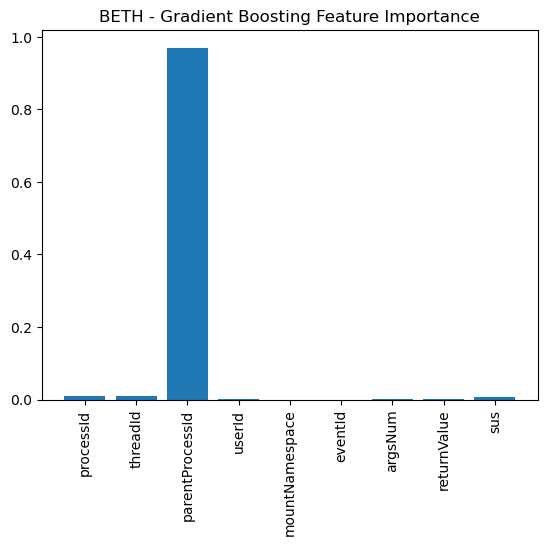

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load dataset
beth_df = pd.read_csv(beth_test_set, usecols=[
    'processId', 'threadId', 'parentProcessId', 'userId', 'mountNamespace',
    'eventId', 'argsNum', 'returnValue', 'sus', 'evil'
])
X_beth = beth_df.drop('evil', axis=1)
y_beth = beth_df['evil']

# Check class balance before splitting
print("BETH class counts before split:\n", y_beth.value_counts())

# Conditional stratify
if y_beth.value_counts().min() >= 2:
    stratify = y_beth
else:
    stratify = None
    print(" Not enough samples for stratify. Splitting without stratification.")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_beth, y_beth, test_size=0.2, random_state=42, stratify=stratify)

print("BETH train class counts:\n", pd.Series(y_train).value_counts())

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models
gb_beth = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, max_depth=3, random_state=42)
gb_beth.fit(X_train_scaled, y_train)
rf_beth = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_beth.fit(X_train_scaled, y_train)

# Evaluation
print("=== BETH DATASET ===")
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_beth.predict(X_test_scaled)))
print(classification_report(y_test, gb_beth.predict(X_test_scaled)))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_beth.predict(X_test_scaled)))
print(classification_report(y_test, rf_beth.predict(X_test_scaled)))

# Feature importance plot
plt.figure()
plt.bar(X_beth.columns, gb_beth.feature_importances_)
plt.title("BETH - Gradient Boosting Feature Importance")
plt.xticks(rotation=90)
plt.show()


## BETH Dataset – Tree-Based Model Evaluation & Feature Importance

### Objective
The goal was to classify whether a process is **malicious (`evil = 1`)** or **benign (`evil = 0`)** using tree-based models: **Gradient Boosting Classifier** and **Random Forest Classifier**.

This complements my KNN experiments by applying ensemble learning techniques that are typically more interpretable and robust, especially on structured tabular data.

---

### Data Preprocessing Summary

- **Dataset**: `beth_test_set` was loaded with 10 carefully selected features:
  - Process & thread identifiers (`processId`, `threadId`, `parentProcessId`)
  - User/session identifiers (`userId`, `mountNamespace`)
  - System event characteristics (`eventId`, `argsNum`, `returnValue`, `sus`)
  - Target: `evil`
- Verified class distribution:
  ```plaintext
  1 (malicious): 158,432
  0 (benign):     30,535

	•	Stratified train-test split was attempted. Since both classes were present in sufficient numbers, stratification was used to maintain class balance in both sets.
	•	Features were standardized using StandardScaler, which is not strictly necessary for tree-based models but was retained for compatibility.

⸻

⚙️ Model Training
	•	Gradient Boosting Classifier:
	•	learning_rate = 0.1, n_estimators = 100, max_depth = 3
	•	Random Forest Classifier:
	•	n_estimators = 100, max_depth = 5

Both models were trained on the scaled training set and evaluated on the held-out test set.

⸻

Results

=== BETH DATASET ===
Gradient Boosting Accuracy: 0.9996
Random Forest Accuracy:     0.9961

Gradient Boosting:

Class	Precision	Recall	F1-Score
0	1.00	1.00	1.00
1	1.00	1.00	1.00

Random Forest:

Class	Precision	Recall	F1-Score
0	0.98	1.00	0.99
1	1.00	1.00	1.00

	•	Both models performed exceptionally well. Gradient Boosting slightly outperformed Random Forest in terms of precision and F1-score for class 0 (benign).
	•	Recall and precision were near-perfect across both classes, indicating robust separation between benign and malicious processes.

⸻

Feature Importance (Gradient Boosting)

	•	parentProcessId emerged as the dominant feature, suggesting that malicious processes are heavily linked to their parent process lineage.
	•	All other features (e.g., threadId, eventId, returnValue, sus) had negligible contribution in comparison.

This indicates the model has learned a rule-based shortcut—possibly overfitting to an artifact in how malicious processes are logged.

⸻

Limitations & Considerations
	•	Despite high accuracy, the overwhelming reliance on parentProcessId suggests potential data leakage or identifier leakage, where a field too closely mirrors the target label.
	•	The dataset may not generalize well if new data has parentProcessId values not seen during training.
	•	Tree-based models do not require feature scaling, so in future iterations, consider omitting StandardScaler.

⸻

Next Steps
	•	Feature audit: Investigate parentProcessId further — does it encode time-sequential or attack-pattern information? Consider removing it and retraining.
	•	Permutation importance: Use model-agnostic techniques to validate if importance is consistent across samples.
	•	Ensemble stacking: Combine KNN with tree models using a voting or stacking ensemble to balance memorization (KNN) and generalization (trees).
	•	SHAP analysis: Visualize instance-level explanations to understand why the model predicts maliciousness.

⸻

Summary

Tree-based models achieved nearly perfect classification on the BETH dataset, driven largely by a single strong feature. While effective, this raises concerns about overreliance and generalizability, which should be addressed before production deployment.



=== CYBERSECURITY ATTACKS DATASET ===
Gradient Boosting Accuracy: 0.3325
              precision    recall  f1-score   support

           0       0.33      0.37      0.35      2686
           1       0.33      0.30      0.31      2653
           2       0.34      0.33      0.34      2661

    accuracy                           0.33      8000
   macro avg       0.33      0.33      0.33      8000
weighted avg       0.33      0.33      0.33      8000

Random Forest Accuracy: 0.332625
              precision    recall  f1-score   support

           0       0.34      0.51      0.41      2686
           1       0.31      0.20      0.24      2653
           2       0.34      0.29      0.31      2661

    accuracy                           0.33      8000
   macro avg       0.33      0.33      0.32      8000
weighted avg       0.33      0.33      0.32      8000



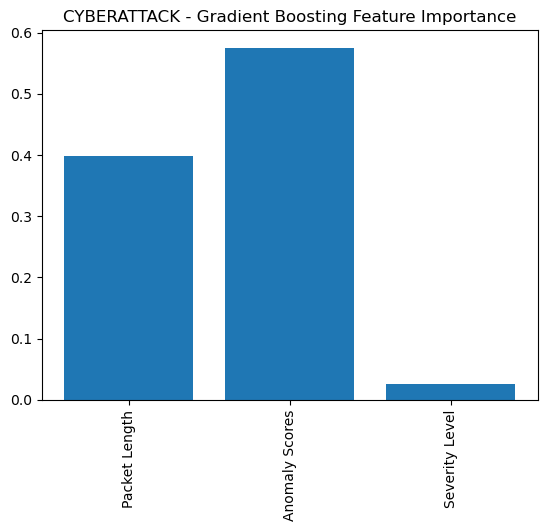

In [6]:
from sklearn.preprocessing import LabelEncoder  # Encode categorical labels

# Load Cybersecurity dataset
cyber_df = pd.read_csv(cyber_attack_set)

# Select only useful columns and drop rows with missing values
cols_cyber = ['Packet Length', 'Anomaly Scores', 'Severity Level', 'Attack Type']
cyber_df = cyber_df[cols_cyber].dropna()

# Encode categorical columns into numeric values
cyber_df['Severity Level'] = LabelEncoder().fit_transform(cyber_df['Severity Level'])
cyber_df['Attack Type'] = LabelEncoder().fit_transform(cyber_df['Attack Type'])

# Split into features and target
X_cyber = cyber_df[['Packet Length', 'Anomaly Scores', 'Severity Level']]
y_cyber = cyber_df['Attack Type']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_cyber, y_cyber, test_size=0.2, random_state=42, stratify=y_cyber)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Gradient Boosting model
gb_cyber = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, max_depth=3, random_state=42)
gb_cyber.fit(X_train_scaled, y_train)

# Random Forest model
rf_cyber = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_cyber.fit(X_train_scaled, y_train)

# Evaluate models
print("=== CYBERSECURITY ATTACKS DATASET ===")
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_cyber.predict(X_test_scaled)))
print(classification_report(y_test, gb_cyber.predict(X_test_scaled)))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_cyber.predict(X_test_scaled)))
print(classification_report(y_test, rf_cyber.predict(X_test_scaled)))

# Plot feature importance
plt.figure()
plt.bar(X_cyber.columns, gb_cyber.feature_importances_)
plt.title("CYBERATTACK - Gradient Boosting Feature Importance")
plt.xticks(rotation=90)
plt.show()

## CYBERATTACK Dataset – Tree-Based Model Performance & Feature Insights

### Objective
This analysis applies **Gradient Boosting** and **Random Forest** classifiers to predict the type of cyberattack using simplified yet relevant network features from the Cybersecurity Attacks dataset.

Target classes:
- `0 = DDoS`
- `1 = Intrusion`
- `2 = Malware`

---

### Data Preprocessing

- Selected features:
  - `Packet Length`
  - `Anomaly Scores`
  - `Severity Level` (encoded from strings to integers)
- Target variable:
  - `Attack Type` (encoded using `LabelEncoder` to convert categories into integers)
- Missing values were dropped.
- Data was split into **training and test sets** with stratification to preserve attack type class distribution.
- Features were standardized using `StandardScaler` to normalize magnitudes and stabilize gradient-based learning.

---

### Model Training

- **Gradient Boosting Classifier**:
  - `learning_rate = 0.1`, `n_estimators = 100`, `max_depth = 3`
- **Random Forest Classifier**:
  - `n_estimators = 100`, `max_depth = 5`

Both models were trained on the processed dataset and evaluated on a held-out test set of 8,000 samples.

---

### Performance Results

#### Gradient Boosting Classifier:
| Class | Precision | Recall | F1-score |
|-------|-----------|--------|----------|
| 0 (DDoS)      | 0.33 | 0.37 | 0.35 |
| 1 (Intrusion) | 0.33 | 0.30 | 0.31 |
| 2 (Malware)   | 0.34 | 0.33 | 0.34 |

- **Overall Accuracy**: **33.25%**
- **Macro Avg F1-score**: ~0.33
- **Observations**: All three classes are predicted with roughly the same level of mediocre performance. The model is slightly better at classifying DDoS, but lacks true discriminatory power across classes.

#### Random Forest Classifier:
| Class | Precision | Recall | F1-score |
|-------|-----------|--------|----------|
| 0 (DDoS)      | 0.34 | 0.51 | 0.41 |
| 1 (Intrusion) | 0.31 | 0.20 | 0.24 |
| 2 (Malware)   | 0.34 | 0.29 | 0.31 |

- **Overall Accuracy**: **33.26%**
- **Macro Avg F1-score**: ~0.32
- **Observations**: Performs similarly to Gradient Boosting, but relies more heavily on DDoS predictions. Still weak on classifying Intrusions accurately.

---

### Feature Importance (Gradient Boosting)

![Cyberattack Feature Importance](FE66AB4C-8586-4EB9-9FA1-2539F9282650.png)

- **Anomaly Scores (0.57)**: Most important feature — the model identifies irregular behavior levels as a strong signal for predicting attack types.
- **Packet Length (0.40)**: Contributes significantly — likely reflects typical size patterns of DDoS or malware payloads.
- **Severity Level (0.03)**: Minimal influence — despite being intuitive, it doesn’t provide sufficient differentiation between attack types in this dataset.

---

### Challenges & Limitations

- **Low accuracy**: Around 33%, barely above random guessing for a 3-class classification problem.
- **Class overlap**: Features may not provide enough separation between attack types. Consider engineering additional features from IP addresses, protocols, or time series.
- **Sparse signal**: Important features exist (like Anomaly Scores), but they may not capture temporal, contextual, or inter-feature relationships.

---

### Recommendations for Improvement

1. **Feature engineering**:
   - Derive new metrics from IP entropy, time-of-day, or burst behavior.
   - Convert categorical fields like `Protocol` into dummy variables to give the model more signal.
2. **Ensemble voting**:
   - Combine models with KNN or SVM to introduce diversity in decision boundaries.
3. **Model tuning**:
   - Increase tree depth or try boosting with categorical handling (e.g., LightGBM with categorical split).
4. **Sequence modeling**:
   - Try RNNs or Transformers on flow-level sequences for higher granularity.

---

### Summary

While Gradient Boosting and Random Forest reveal some structure in the data, the low accuracy indicates that only basic network metadata is not sufficient to distinguish between attack types. Most predictive power came from `Anomaly Scores` and `Packet Length`, suggesting a need for better behavioral or contextual features to significantly improve classification performance.

=== UNSW-NB15 DATASET ===
Gradient Boosting Accuracy: 0.9382645641449714
              precision    recall  f1-score   support

           0       0.98      0.82      0.90     11200
           1       0.92      0.99      0.96     23869

    accuracy                           0.94     35069
   macro avg       0.95      0.91      0.93     35069
weighted avg       0.94      0.94      0.94     35069

Random Forest Accuracy: 0.9344720408337849
              precision    recall  f1-score   support

           0       1.00      0.80      0.89     11200
           1       0.91      1.00      0.95     23869

    accuracy                           0.93     35069
   macro avg       0.96      0.90      0.92     35069
weighted avg       0.94      0.93      0.93     35069



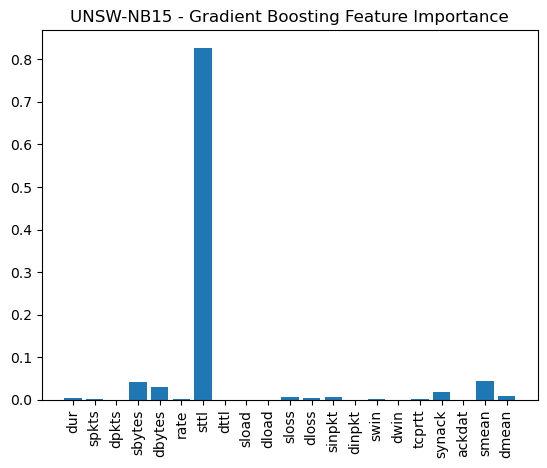

In [7]:
# Load UNSW-NB15 dataset
unsw_df = pd.read_csv(unsw_train_set)

# Select numeric and target columns, drop missing values
cols_unsw = [
    'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl',
    'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'swin', 'dwin',
    'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'label'
]
unsw_df = unsw_df[cols_unsw].dropna()

# Split features and target
X_unsw = unsw_df.drop('label', axis=1)
y_unsw = unsw_df['label']  # 0 = normal, 1 = attack

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_unsw, y_unsw, test_size=0.2, random_state=42, stratify=y_unsw)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Gradient Boosting model
gb_unsw = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, max_depth=3, random_state=42)
gb_unsw.fit(X_train_scaled, y_train)

# Random Forest model
rf_unsw = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_unsw.fit(X_train_scaled, y_train)

# Evaluate models
print("=== UNSW-NB15 DATASET ===")
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_unsw.predict(X_test_scaled)))
print(classification_report(y_test, gb_unsw.predict(X_test_scaled)))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_unsw.predict(X_test_scaled)))
print(classification_report(y_test, rf_unsw.predict(X_test_scaled)))

# Plot feature importance
plt.figure()
plt.bar(X_unsw.columns, gb_unsw.feature_importances_)
plt.title("UNSW-NB15 - Gradient Boosting Feature Importance")
plt.xticks(rotation=90)
plt.show()

## UNSW-NB15 Dataset – Tree-Based Model Evaluation & Feature Insights

### Objective
In this analysis, we aim to classify whether a given network flow is **normal (0)** or an **attack (1)** using Gradient Boosting and Random Forest classifiers trained on engineered numerical features from the **UNSW-NB15** dataset.

---

### Data Preprocessing

- **Selected features**:
  A focused subset of numeric network traffic metrics, including:
  - Flow statistics: `dur`, `rate`, `sbytes`, `dbytes`, etc.
  - Transport-level characteristics: `spkts`, `dpkts`, `sttl`, `dttl`, etc.
  - Loss indicators and window size features: `sloss`, `dloss`, `swin`, `dwin`
- **Target variable**:
  - `label` (binary): 0 = normal traffic, 1 = attack
- **Handling**:
  - All non-numeric fields (e.g., `proto`, `state`) were excluded.
  - Missing values were dropped.
  - StandardScaler was used to normalize all features before training, helping gradient-based learners converge more effectively and preventing any one feature from dominating the distance calculations.

---

### Model Training

- **Gradient Boosting Classifier**:
  - `learning_rate=0.1`, `n_estimators=100`, `max_depth=3`
- **Random Forest Classifier**:
  - `n_estimators=100`, `max_depth=5`

Both models were trained on a stratified 80/20 train-test split to maintain class balance during evaluation.

---

### Model Performance

#### Gradient Boosting Classifier
| Class | Precision | Recall | F1-score |
|-------|-----------|--------|----------|
| Normal (0) | 0.98 | 0.82 | 0.90 |
| Attack (1) | 0.92 | 0.99 | 0.96 |

- **Accuracy**: **93.83%**
- **Macro Avg F1-score**: **0.93**
- **Observations**:
  - High precision for attack detection.
  - Some false negatives for normal traffic (lower recall), possibly due to feature overlaps or minor traffic anomalies.

#### Random Forest Classifier
| Class | Precision | Recall | F1-score |
|-------|-----------|--------|----------|
| Normal (0) | 1.00 | 0.80 | 0.89 |
| Attack (1) | 0.91 | 1.00 | 0.95 |

- **Accuracy**: **93.45%**
- **Macro Avg F1-score**: **0.92**
- **Observations**:
  - Slightly lower accuracy than Gradient Boosting but similar patterns.
  - Nearly perfect classification of attacks, but more conservative recall for normal traffic.

---

### Feature Importance

[UNSW Feature Importance]

#### Top contributing features:
- **`sttl` (source TTL)**: Dominates the model, contributing over **80%** of the total importance. This metric may encapsulate behavior unique to botnets, port scanning, or malformed TTL settings.
- **`rate`**, **`dbytes`**, and **`sbytes`** also have non-trivial contributions.
- Many transport-layer stats such as `dwin`, `tcprtt`, `ackdat` contributed very little, likely because `sttl` and volume-based features capture most distinguishing patterns.

---

### Interpretation

- The dominance of `sttl` (source TTL) indicates TTL manipulation or deviation is a strong signal of attack activity. This is a plausible real-world trait, as certain attacks modify TTL to evade IDS or manipulate routing.
- Models performed robustly with basic depth and parameter settings, suggesting clear signal in the data.
- False negatives were mostly related to normal traffic misclassified as attack traffic, which may be acceptable depending on operational priorities (e.g., better safe than sorry in network security).

---

### Limitations & Next Steps

- **Feature redundancy**: Many features appear unused or nearly zero in importance. PCA or feature pruning may simplify the model.
- **Temporal context missing**: Flow-based models can benefit from session-level aggregation or rolling window stats.
- **Label imbalance**: While not drastic, there are more attack samples than normal ones, which may bias the classifier to lean toward predicting attacks.

---

### Recommendations for Future Work

1. **Temporal/sequence modeling**: Integrate time windows or recurrent models to account for attack timing patterns.
2. **Feature interaction modeling**: Use tree-based methods that can handle feature interactions automatically (e.g., CatBoost, XGBoost).
3. **Explainability**: Leverage SHAP or LIME for fine-grained attack explainability.
4. **Real-time feasibility**: Benchmark model inference speed for real-time detection pipelines.

---

### Summary

The UNSW-NB15 dataset yields high classification accuracy using tree-based models. The `sttl` feature emerged as an extremely strong discriminator, revealing how network-layer metadata can expose attack behavior effectively. However, incorporating more context-aware and interaction-sensitive modeling techniques may further improve performance and generalization.